In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [2]:
zip_location= 'Cheeta vs Hyena Classification.zip'
zip_ref=zipfile.ZipFile(zip_location,'r')
zip_ref.extractall('../data/')
zip_ref.close()

In [10]:
print(len(os.listdir('../data/NotPetImages/Training/cheetah')))
print(len(os.listdir('../data/NotPetImages/Training/hyena')))

print(len(os.listdir('../data/NotPetImages/validation/cheetah')))
print(len(os.listdir('../data/NotPetImages/validation/hyena')))

900
900
100
100


In [11]:
source_dir = '../data/NotPetImages'

In [ ]:
cheetah_list_train = [name for name in os.listdir(os.path.join(source_dir, 'Training', 'cheetah')) if os.path.getsize(os.path.join(source_dir, 'Training', 'cheetah', name)) > 0]
hyena_list_train = [name for name in os.listdir(os.path.join(source_dir, 'Training', 'hyena')) if os.path.getsize(os.path.join(source_dir, 'Training', 'hyena', name)) > 0]

len(cheetah_list_train), len(hyena_list_train)

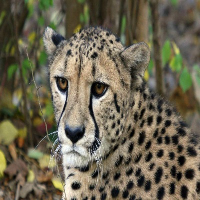

In [95]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
load_img(os.path.join(source_dir,'Training/cheetah',cheetah_list_train[898]),target_size=(200,200))

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
train_generator = train_datagen.flow_from_directory(
    '../data/NotPetImages/Training',
    target_size = (200,200),
    batch_size = 40,
    shuffle = True,
    class_mode = 'binary'  #category  #multiple
)

Found 1800 images belonging to 2 classes.


In [77]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    '../data/NotPetImages/validation',
    target_size = (200,200),
    batch_size = 10,
    class_mode = 'binary'
)

Found 200 images belonging to 2 classes.


In [74]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

c:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer = "rmsprop",metrics=["accuracy"])

In [78]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 45,
    epochs = 7,
    validation_data = test_generator,
    validation_steps = 20
)

c:\Users\Acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.5197 - loss: 0.8226 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5084 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 3/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5236 - loss: 0.6960 - val_accuracy: 0.5750 - val_loss: 0.6823
Epoch 4/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5841 - loss: 0.7199 - val_accuracy: 0.6600 - val_loss: 0.6144
Epoch 5/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7122 - loss: 0.5891 - val_accuracy: 0.7700 - val_loss: 0.4771
Epoch 6/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7451 - loss: 0.5419 - val_accuracy: 0.8000 - val_loss: 0.4512
Epoch 7/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7917 - loss: 0.4497 - val_accuracy: 0.8300 - val_loss: 0.3521


In [ ]:
hist1 = model.fit(
    train_generator,
    steps_per_epoch = 45,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 20
)

#overfitting at the end (last Epoch) - memorization

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7995 - loss: 0.4525 - val_accuracy: 0.6650 - val_loss: 0.6086
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8284 - loss: 0.3856 - val_accuracy: 0.7950 - val_loss: 0.4166
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8186 - loss: 0.3944 - val_accuracy: 0.8950 - val_loss: 0.2828
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8122 - loss: 0.4136 - val_accuracy: 0.8250 - val_loss: 0.3564
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8843 - loss: 0.3015 - val_accuracy: 0.9000 - val_loss: 0.2363
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8832 - loss: 0.3476 - val_accuracy: 0.8650 - val_loss: 0.2758
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8960 - loss: 0.2665 - val_accuracy: 0.8800 - val_loss: 0.3066
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8989 - loss: 0.2549 - val_accuracy: 0.9250 - val_los

In [80]:
model.save('./NotPets_model.h5')

In [81]:
train_generator.class_indices

{'cheetah': 0, 'hyena': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Prediction  0.9977998
Predicted class: Hyena


'Hyena'

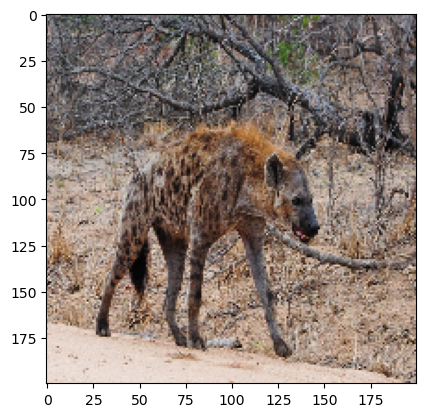

In [97]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = tf.keras.models.load_model('NotPets_model.h5')
def predict_image(image_path):
    img = load_img(image_path, target_size=(200, 200))
    plt.imshow(img) 
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    prediction = model.predict(img_array)[0][0]
    print("Prediction ",prediction)
    if prediction>0.5:
        predicted_class='Hyena'
    else:
        predicted_class='Cheetah'

    print(f"Predicted class: {predicted_class}")
    return predicted_class

image_path = '../data/kruger-2727258_640.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction  0.058934625
Predicted class: Cheetah


'Cheetah'

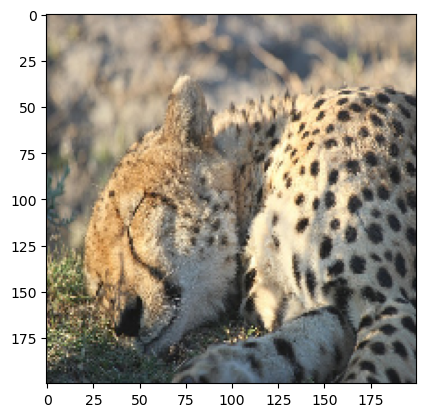

In [98]:
image_path01 = '../data/animal-5013600_640.jpg'
predict_image(image_path01)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Prediction  0.9999935
Predicted class: Hyena


'Hyena'

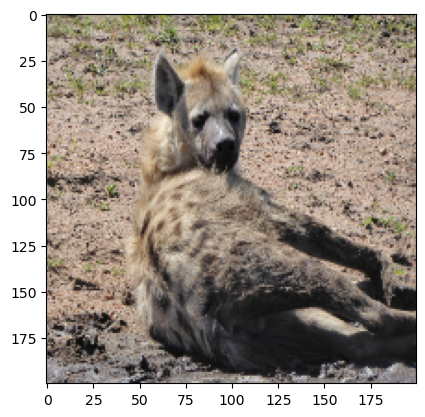

In [100]:
image_path02 = '../data/NotPetImages/validation/hyena/hyena_054_val_resized.jpg'
predict_image(image_path02)